Regulation Strength: 0.001, Test Accuracy: 0.625
Regulation Strength: 0.01, Test Accuracy: 0.625
Regulation Strength: 0.1, Test Accuracy: 0.625
Regulation Strength: 1, Test Accuracy: 0.8472222222222222
Regulation Strength: 10, Test Accuracy: 0.8611111111111112
Regulation Strength: 100, Test Accuracy: 0.8611111111111112


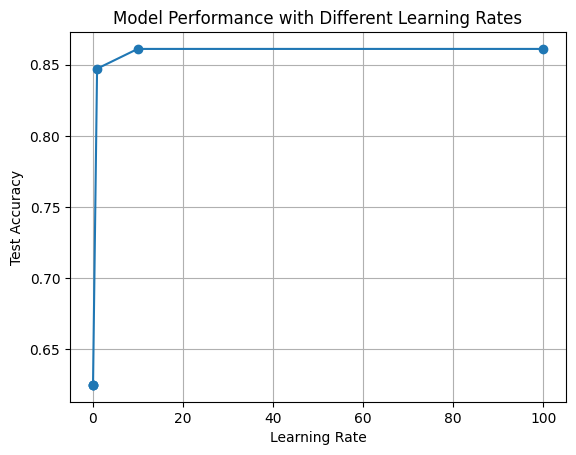

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

# Load data
df = pd.read_csv('call_transcript_cleaned.csv')
X = df['TEXT']
y = df['CATEGORY']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the text data into TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Define learning rates to iterate over
regularization_strengths = [0.001, 0.01, 0.1, 1, 10, 100]

# Initialize lists to store results
accuracies = []

# Iterate over learning rates
for c in regularization_strengths:
    svm = SVC(C=c, kernel='linear')
    svm.fit(X_train_tfidf, y_train)

    # Predictions
    predictions = svm.predict(X_test_tfidf)

    # Evaluate and store accuracy
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

    print(f"Regulation Strength: {c}, Test Accuracy: {accuracy}")

# Plotting the results
plt.plot(regularization_strengths, accuracies, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Test Accuracy')
plt.title('Model Performance with Different Learning Rates')
plt.grid(True)
plt.show()

Regulation Strength: 0.001, Test Accuracy: 0.625
Regulation Strength: 111.11200000000001, Test Accuracy: 0.8611111111111112
Regulation Strength: 222.223, Test Accuracy: 0.8611111111111112
Regulation Strength: 333.334, Test Accuracy: 0.8611111111111112
Regulation Strength: 444.445, Test Accuracy: 0.8611111111111112
Regulation Strength: 555.556, Test Accuracy: 0.8611111111111112
Regulation Strength: 666.667, Test Accuracy: 0.8611111111111112
Regulation Strength: 777.778, Test Accuracy: 0.8611111111111112
Regulation Strength: 888.889, Test Accuracy: 0.8611111111111112
Regulation Strength: 1000.0, Test Accuracy: 0.8611111111111112


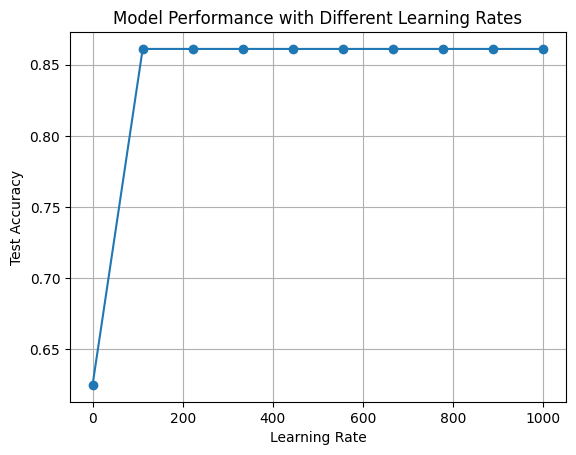

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

# Load data
df = pd.read_csv('call_transcript_cleaned.csv')
X = df['TEXT']
y = df['CATEGORY']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the text data into TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Define learning rates to iterate over
regularization_strengths = np.linspace(0.001, 1000, 10)

# Initialize lists to store results
accuracies = []

# Iterate over learning rates
for c in regularization_strengths:
    svm = SVC(C=c, kernel='linear')
    svm.fit(X_train_tfidf, y_train)

    # Predictions
    predictions = svm.predict(X_test_tfidf)

    # Evaluate and store accuracy
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

    print(f"Regulation Strength: {c}, Test Accuracy: {accuracy}")

# Plotting the results
plt.plot(regularization_strengths, accuracies, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Test Accuracy')
plt.title('Model Performance with Different Learning Rates')
plt.grid(True)
plt.show()

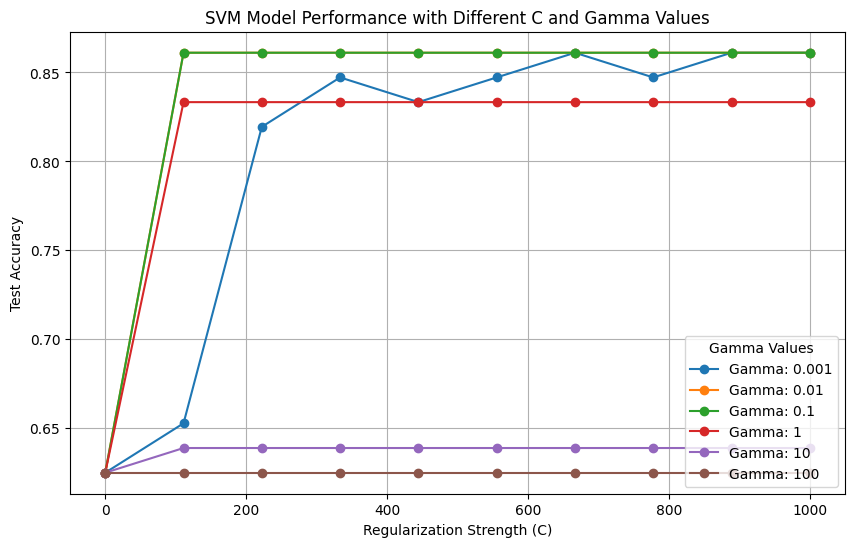

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

# Load data
df = pd.read_csv('call_transcript_cleaned.csv')
X = df['TEXT']
y = df['CATEGORY']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the text data into TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Define learning rates to iterate over
regularization_strengths = np.linspace(0.001, 1000, 10)
gamma_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Initialize a dictionary to store accuracies for each hidden layer size
accuracy_dict = {g: [] for g in gamma_values}

# Iterate over regularization strengths and gamma values
for c in regularization_strengths:
    for g in gamma_values:
        # Use RBF kernel as gamma is relevant for non-linear kernels
        svm = SVC(C=c, kernel='rbf', gamma=g)
        svm.fit(X_train_tfidf, y_train)

        # Make predictions
        predictions = svm.predict(X_test_tfidf)

        # Evaluate and store accuracy
        accuracy = accuracy_score(y_test, predictions)

        # Store accuracy in the dictionary
        accuracy_dict[g].append((c, accuracy))

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot accuracy for each gamma value
for gamma, accuracies in accuracy_dict.items():
    learning_rates, accuracies = zip(*accuracies)
    plt.plot(learning_rates, accuracies, marker='o', label=f'Gamma: {gamma}')

plt.xlabel('Regularization Strength (C)')
plt.ylabel('Test Accuracy')
plt.title('SVM Model Performance with Different C and Gamma Values')
plt.legend(title='Gamma Values', loc='lower right')
plt.grid(True)
plt.show()